# Введение в искусственные нейронные сети
# Урок 5. Сверточные нейронные сети

## Содержание методического пособия:


<ol>
<li>Что такое Сверточные нейронные сети</li>
<li>Архитектура Сверточных нейронных сетей</li>
<li>Несколько практических примеров сверточных нейронных сетей на Keras</li>
</ol>

## Что такое Сверточные нейронные сети

Сверточные нейронные сети - это нейронные сети приспособленные впервую очередь для задач распознования образов. В их основе лежат работы в области изучения зрительной коры головного мозга. Их отличительная черта - добавление сверточных и пуллинговых слоев в архитектуру нейронной сети. Подробности архитектуры мы рассмотрим в следующей части данного методического пособия, а пока давайте взглянем на области применения данного вида нейронных сетей:

- Задачи связанные с определением того какому классу принадлежит объект на фотографии

- Сверточные нейронные сети в модифицированном виде могут определять не только что находиться на фотографии, но где находиться (этому виду нейронных сетей будет посвящен отдельный урок)

- Распознование лиц. В 2001 г. появился алгоритм Виолы-Джонса, который предложил технологию позволяющую технике находить лица на фотографиях и  в видеопотоке. На данный момент по эфективности этот алгоритм превзайден свертончными нейронными сетями.

- Проставление лейблов изображениям. Используется Google, Amazon, Facebook

- Визуальный поиск. Используется Google

- Рекомендательные системы. Amazon например, использует это для секции "вам также может понравиться" для одежды.

- В социальных сетях, с помощью них отмечаются люди на фотографиях

- Помощь врачам в анализе медицинских снимков

- Предиктивная аналитика. Помощь в предсказании проблем со здоровьем

- Оценка цифр написанных от руки банками. Одно из самых ранних применений сверточных нейронных сетей.

Однако применение сверточных нейронных сетей не ограничивается областью компьютерного зрения. Они также применяются и в других областях:

- Анализ текстов. Для этого больше подходят рекуррентные нейронные сети, но когда речь заходит о детекции определенных признаков в тексте например бранной речи, лучше могут подойти сверточные нейронные сети

- Предиктивный анализ. В частности предсказание погоды.


## Глубокое обучение
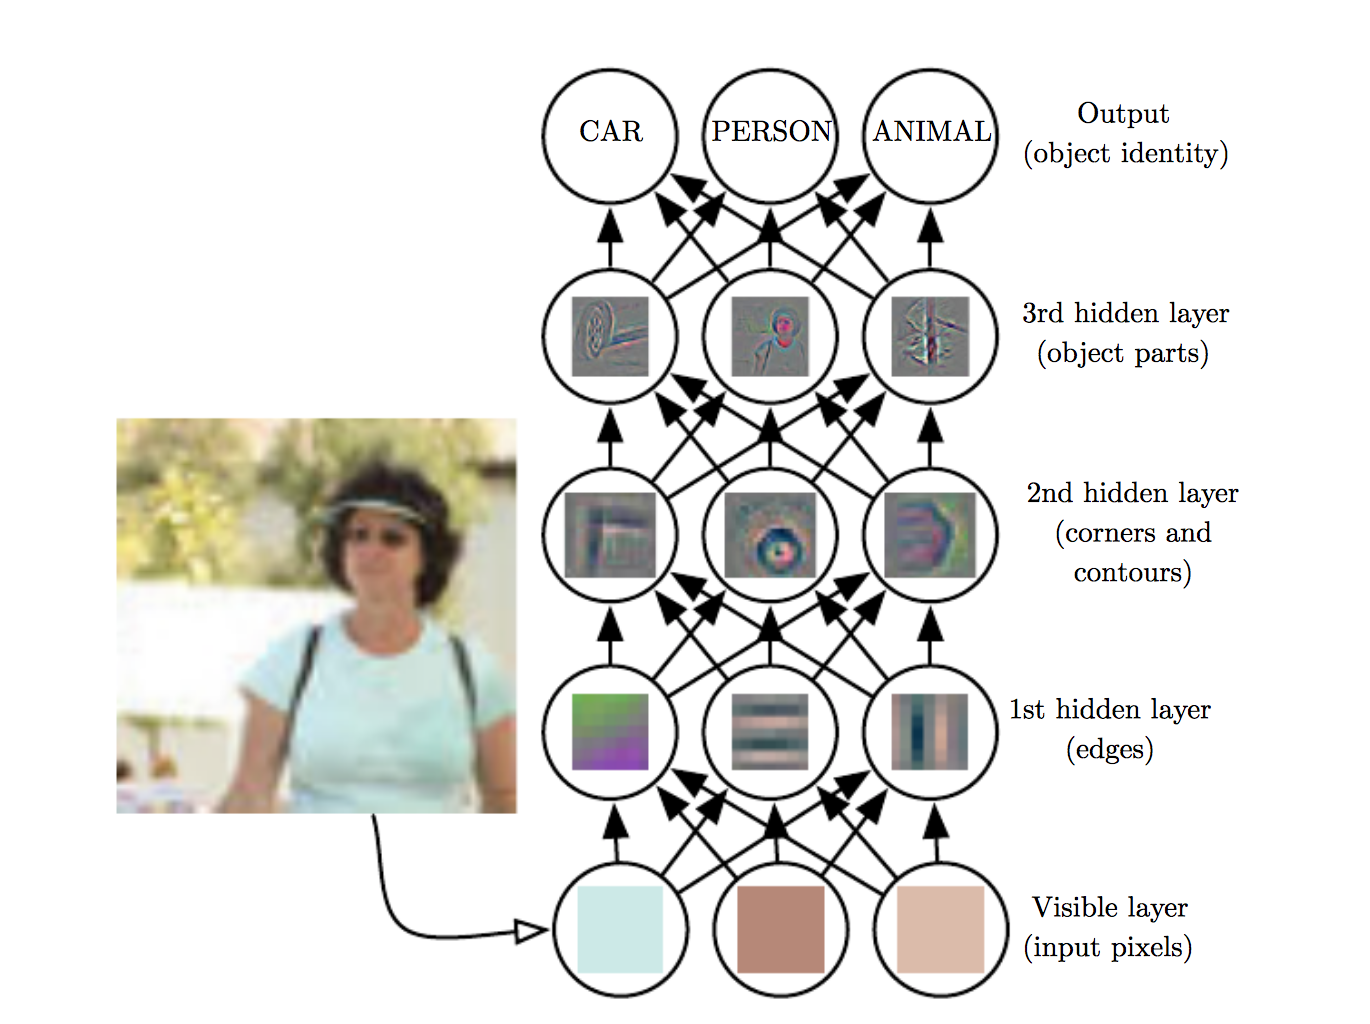

Источник изображения - https://camo.githubusercontent.com/920e95dc71acebe014549c9288cbf42cbe5c8afc/68747470733a2f2f6861726973686e61726179616e616e2e6f72672f696d616765732f77726974696e672f61727469737469632d7374796c652d7472616e736665722f726570726573656e746174696f6e2d6c6561726e696e672e706e67



Глубокое обучение - это обучение глубоких нейронных сетей. Глубокие нейронные сети - это сети с больше чем одним внутренним слоем.

Однако, прежде чем мы начнем разбирать глубокое обучение давайте в кратце опишем сверточные нейронные сети. Типичная сверточная нейронная сеть состоит из входного слоя и череды сверточных и пуллинговых слоев, следующих как правило друг за другом и нескольких полносвязных слоев на выходе.

Давайте попробуем разобраться в смысле данной архитектуры и как она связана с глубоким обучением. В отношение нейронных сетей известно, что нейронная сеть в один слой может лишить любую задачу. Но такой подход будет очень грубым решением проблемы и вычислительной мощности современных компьютеров не хватит, чтобы нейронная сеть в один слой например могла различать классы объектов на фотографии. 

Данная диллема решается через другой научный факт известный в отношении нейронных сетей - чем больше слоев тем эффективнее нейросеть. Т.е. строя многослойную нейронную сеть может понадобиться меньше нейронов чем если строить однослойную. Связано это с тем, что каждый слой выучивает признаки на определенном уровне абстракции и следующии за ним слои используют уже имеющиеся признаки, а не выучивают их заново.

Давайте в общих чертах посмотрим на то, как происходит процесс обучение в глубокой нейронной сети, поскольку такой же процесс в общих чертах будет характерен и для сверточных нейронных сетей.

Допустим мы будем работать с изображениями животных. Первые слои выучат признаки животных низкого уровня абстракции такие как линии под определенными углами, следующие слои на базе этих признаков выучат более сложные признаки, например геом. фигуры на базе сочетания этих линий. Следующие слои выучат такие признаки как глаза, уши и т.д. которые будут составлены из этих геометрических фигур. Подобные высокоасбтрактные признаки как названнные выше уже можно использовать для того чтобы сделать заключение какое животное на картинке.

Описанная система лучше с точки зрения вычислительных затрат. Однако если мы сделаем несколько полносвязных слоев где каждый нейрон связан с каждым нейроном другого слоя, то на обсчитывание этих связей уйдет меньше вычисл. ресурсов чем если бы нейронная сеть была в один слой, но всеравно такая нейронная сеть в не учебных задачах будет обучаться неприемлимо долго. 


## Архитектура Сверточных нейронных сетей

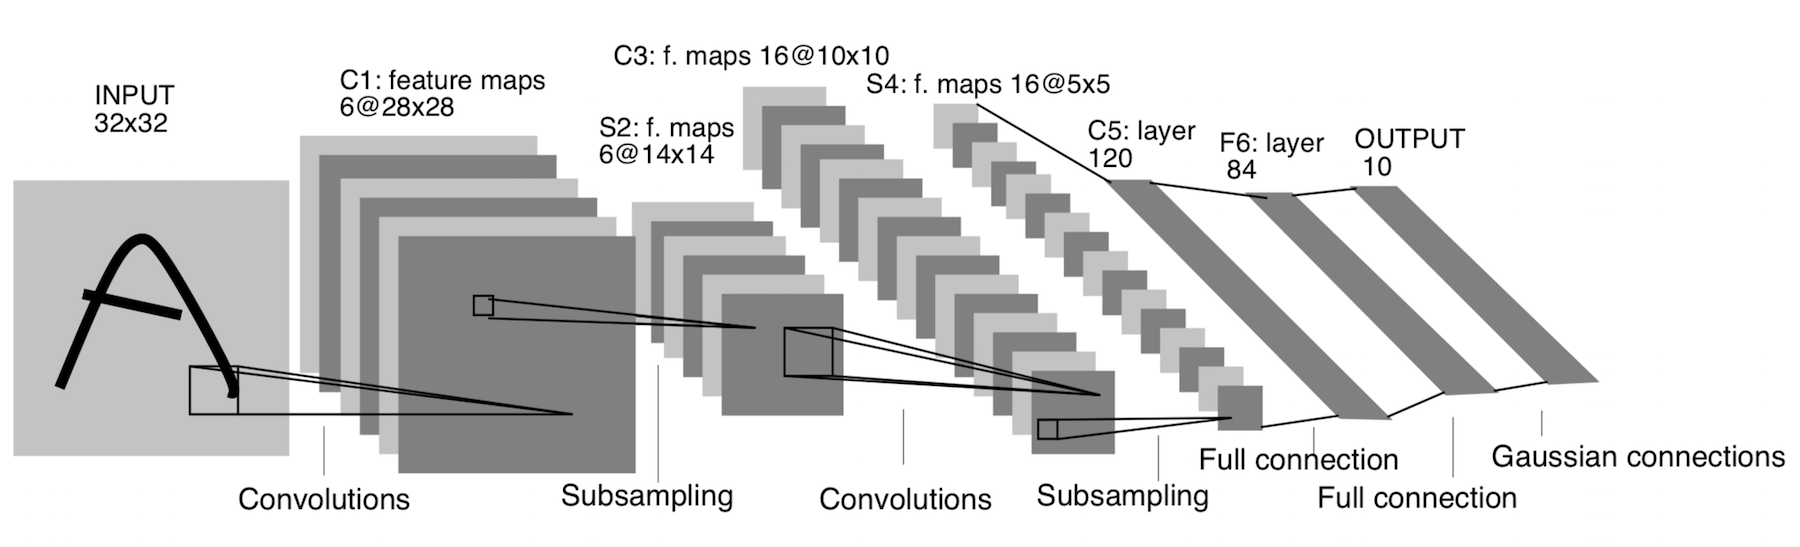
Источник - http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

Сверточные нейронные сети - это самый природо-подобный алгоритм из всех. Современные сверточные нейронные сети базируется на произведшей революцию в комп. зрении нейронной сети AlexNet, она базируется на сверточных нейронных сетях, которые разрабатывал Ян Лекун в 90 гг., те в свою очередь базируется на японском Neocognitron 1980 г., а он свою очередь на открытиях в области зрительной коры головного мозга. Конечно современные архитектуры сверточных нейронных сетей такие Inception-v4 сильно отличаются от сверточных нейронных сетей 90-x. Однако у них есть общие черты, которые и делают сверточные нейронные сети эффективными. Особенности сверточных нейронных сетей о которых речь пойдет далее призваны помочь строить глубокие нейронные сети, имеющими меньшие вычислительные затраты чем полносвязные. 

Главная отличительная черта сверточных нейронных сетей - это наличие сверточных слоев и пуллинг слоев. Подобные слои как раз и были обнаружены в зрительной коре головного мозга, но они называны по другому и работают конечно более сложным образом. В искусственной нейронной сети сверточный слой состоит из фрагментов, которые связаны только с определенной частью изображения, что позволяет не связывать каждый нейрон с каждым пикселем и уменьшить вычислительные затраты. Конечная цель сверточного слоя получить определенные признаки от изображения и передать их в следующий слой, точно также как и случае с обычной полнозсвязной нейронной сетью. Но сверточный слой это делает более эффективно. Если говорить упрощенно, то сама операция свертки предствляет из себя процесс преобразования большего набора чисел в меньший набор чисел их репрезентующий. Пуллинг слои следуют за сверточными слоями и призваны очистить от лишней информации эти признаки и убрать у них локальную привязку. Сама операция пуллинга если говорить опять же упрощенно представляет из себя процесс отбрасывания менее значимых сигналов представленных в виде чисел. Пулинг слои являются важной состовляющей нейронных сетей, однако из-за них сверточной нейронной сети всеравно где располагаются глаза например у кота над носом или под носом, главное сочетание этих признаков.

Сверточная нейронная сеть строиться по принципу пирамиды - первые слои содержат больше нейронов, а последующие все меньше и меньше. Связано это с тем что низкоабстрактных признаков больше чем высокоабстрактных.

Как правило на конце нейронной сети располагаются несколько полносвязных слоев. Эти слои как раз уже учатся на высокоабстрактных признаках которых немного и соотвественно не требуется много слоев и соотвесвенно с точки зрения вычислительных затрат они приемлимы. Т.е. получается сверточную нейронную сеть можно условно поделить на две части - одна извлекается признаки, а другая, полносвязная обучается на этих признаках.

Однако стоит отметить, что современные сверточные нейронные сети в целях оптимизации их работы снабжаются многим дополнительными архитектурными решениями, такими например как возможность иметь в одном слое разные конфигурации свертки, пропускать при необходимости сигнал обратного распространения ошибки сквозь слои, использование нескольких слоев свертки подряд, неиспользование полносвязных слоев на конце нейронных сетей. Как правило, все эти нововведения направлены на то чтобы сделать нейронные сети более глубокими, что в свою очередь улучшает точность работы нейронных сетей. 





# **Слои сверточных сетей**
1. **Фильтр (свёртка)**
2. **Паддинг**
3. **Пулинг** 

**1. Свертка**

Свертка или конволюция - операция между двумя функциями a (фильтр) и b (изображение), которая возвращает степень "похожести" a и b (см. 1-й пример с сетью, которую не обучаем: в нем весами задаем паттерн, который ищем на исходном изображении, последовательно "прикладывая" фильтр ко всем участкам картинки). Процесс обучения сверточной сети заключается в градиентном подборе этого паттерна. Иначе говоря, фильтр - это матрица настраиваемых весов, значения которых подбираются в ходе минимизации ошибки сети.
Таким образом, $$filter = w \cdot X + b$$. 

Размер матрицы $w$ выбирается исследователем и задается для изображений 2 числами, в случае tf соответствующими количеству пикселей по высоте и ширине $[h, w]$. Обычно количество каналов исходного изображения и сверток первого слоя совпадают. Здесь есть терминологический нюанс: матрица весов по всем каналом назвыается фильтром; при этом двумерная матрица весов, соответствующая одному из каналов, называется ядром свертки (kernel). Т.е. фильтр - это набор из c ядер одинаковой размерности, где c - количество каналов изображения.
Изображение, получившееся после применения свертки, называют картой активации.
На примере ниже всё изображение output - карта активации.

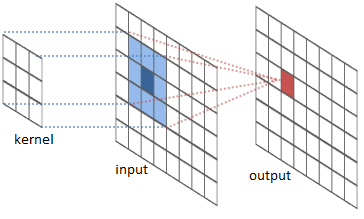


Если фильтр имеет размер ядра больше [1, 1], то применение свертки уменьшает исходное изображение (см. гифку: https://miro.medium.com/max/1400/1*ulfFYH5HbWpLTIfuebj5mQ.gif ). Посмотрим, как меняется размер изображения в свертке.
Пусть размерность картинки img $[w, h, c]$, где w, h - ширина, высота, а c - количество каналов; размерность фильтра filter $[f, f , c]$. Тогда размерность карты активации
$$output = filter(img) = [w - f + 1, h - f + 1, 1]$$
Свертка может быть приложена не к каждой группе пикселей $[F, F]$ исходного ихображения, а идти с некоторым шагом и по горизонтали, и по вертикали. Этот шаг называется $stride$ - смещение в пикселях между последовательным приложением свертки. Идея $stride$ в том, что в близких подгруппах пикселей содержатся очень похожая информация, а значит, можно снизить размерность признакового пространства, отсеяв часть похожих друг на друга групп по признаку пространственного положения. Тогда, если у свертки $stride > 1$, размерность карты активации будет определяться формулой
$$output = filter(img) = [\frac{w - f}{stride} + 1, \frac{h - f}{stride} + 1, 1]$$
при этом при получении дробного числа оно округляется в большую сторону.

Здесь и далее для упрощения я буду использовать в примерах квадратные ядра для всех слоев как самые распространенные, но они могут иметь и форму прямоугольника. 
Количество настраевымых параметров слоя свертки с k фильтрами размера $[F, F]$ считается следующим образом:
$$N = k \cdot (F \cdot F + 1) $$
Единицу добавляем, учитывая bias.

**2. Padding**

Получается, при многократном применении свертки изображение уменьшается - это значит, что количество слоев сверточной сети ограничено начальным размером изображения. Чтобы избежать этого ограничения, используют слой Padding (в tf включен как параметр слоя свертки). Его идея в том, что вокруг изображения создается рамка из 0. Таким образом, размер изображения не меняется, а фильтр может обработать участки изображения в углах, которые меньше его собственного размера (засчет дополнительных пикселей со значением 0). При этом информация не искажается, так как умножение весов на 0 = 0 и не дает вклад в ошибку сети.
Пример работы ядра свертки с $padding \space = \space 1$ и $stride \space = \space 2$ см. в гифке: https://upload.wikimedia.org/wikipedia/commons/0/04/Convolution_arithmetic_-_Padding_strides.gif

**3. Pooling**

Это ещё один инструмент, развившийся из идеи о том, что в изображении соседние пиксели несут почти одинаковую информацию. Pooling - это отображение области изображения $[p, p]$ в одно число. Распространены 2 его вида: average pooling, когда считается среднее арифметическое в квадрате $[p, p]$, и maxpooling, когда из квадрата берется только максимальное значение.
Интересно рассмотреть, как backpropagation проходит через pooling:


*   **MaxPooling**

feedforward:

$ \begin{bmatrix}
1 & 2 \\
 1 & 4
 \end{bmatrix} \rightarrow [4]  $

  backpropagation:

  $ \begin{bmatrix}
0 & 0 \\
 0 & df
 \end{bmatrix} \leftarrow  [df]  $
*   **AveragePooling**

feedforward:

$ \begin{bmatrix}
1 & 2 \\
 1 & 4
 \end{bmatrix} \rightarrow [2]  $

  backpropagation:

  $ \begin{bmatrix}
\frac{df}{4} & \frac{df}{4} \\
 \frac{df}{4} & \frac{df}{4}
 \end{bmatrix} \leftarrow [df]  $

Основная прелесть сверток, кроме способности учитывать близость пикселей по горизонтали и вертикали, в их компактности. Сравним количество параметров для сверточной и полносвязной сетей при обработке одного и того же изображения. Пусть размер изображения $[28, 28, 3]$, тогда полносвязной сети нужно будет обучить $N_{fully \space connected} = 28 \cdot 28 \cdot 3 + 1  \approx 2350$ параметров, а сверточной с размером ядра 5 и 6 фильтрами $ N_{convolutional} = (5 \cdot 5 + 1) \cdot 6  \approx 150$ или в общем виде $ N_{convolutional} = (f \cdot f + 1) \cdot n $, где f, n - размер и количество фильтров.


## Пример создания сверточных и пуллинг слоев на Keras

In [ ]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import GlobalMaxPooling2D

In [ ]:
from keras.layers import AveragePooling2D

AveragePooling2D?

In [ ]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import GlobalMaxPooling2D

# определение входных данных(8 массивов с 8 элементами)
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]

data = asarray(data)
data = data.reshape(1, 8, 8, 1)

# создание модели
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(GlobalMaxPooling2D())

# вывод описания созданной модели
model.summary()

# определение детектора вертикальной линии
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]

# сохранение весов в модель
model.set_weights(weights)

# применение фильтра к входным данным
yhat = model.predict(data)

print(yhat)


## Нейронная сеть Lenet5.

Lenet5 - это одна из первых сверточных нейронных сетей и она отражает характерные для сверточных нейронных сетей набор элементов - сверточные слои, пуллинг слои и полносвязные слои на конце нейронной сети. Данная архитектура послужила основой для многих современных архитектур сверточных нейронных сетей.

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

from keras.models import Sequential
from keras import models, layers
import keras

# инициализация пустой модели
model = Sequential()

# первый сверточный слой    28 x 28 x 6
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой   27 x 27 x 6
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой    23 x 23 x 16
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой  12 x 12 x 16 
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой   8 x 8 x 120
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою   8 * 8 * 120
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

hist = model.fit(x=x_train,y=y_train, epochs=1, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))




## Пример на Keras более сложной сверточной нейронной сети

Давайте теперь попробуем сделать несколько усложненный вариант нейронной сети разобранной ранее. В ней будет на несколько слоев больше и в ней будет использоваться data augumentation, процедура позволяющая за счет искажений изображений увеличить количество тренировочных данных, а как мы знаем чем больше тренировочных данных тем лучше будет работать нейросеть. Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

**Аугментация**

В примере ниже применяется агументация - это намеренная "порча" изображений обучающей выборки для того, чтобы повысить устойчивость и обощающую способность модели. Если сверточная сеть обучалась на снимках, например, в мягком дневном освещении, она может "сломаться" на снимках на замыленную камеру или при другом свете, потому что выученные ей фичи в таком виде изображения перестают работать. Для того, чтобы модель хорошо отрабатывала на изображениях, снятых в неидеальных условиях, ее обучают с применением аугментации. Она включает в себя повороты кадра, растяжение, зашумление и т.д. Существуют специальные библиотеки для аугментации, которые меняет освещение, добавляют в изображение дождь или снег и т.д.

Также обратите внимание, что ниже мы используем генератор, т.е. не храним в памяти одновременно все изображения, а налаживаем эффективную работу с памятью.

In [ ]:
x_train.shape

In [2]:
%%time
from __future__ import print_function
#import keras
# Я поменяла импорт, т.к. keras устанавливается вместе с tensorflow как надстройка над ним и через такой импорт оптимизатор RMSprop становится доступен
# RMSprop как добавляет в градиентный спуск инерцию, так и меняет размер градиентного шага:  https://keras.io/api/optimizers/rmsprop/
from tensorflow import keras 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import set_random_seed
from keras.utils import np_utils
import os

set_random_seed(12)

# установка параметров нейросети
batch_size = 256
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(64, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=8)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры
Использование data augmentation в реальном времени
Epoch 1/5
196/196 [==============================] - 465s 2s/step - loss: 2.0330 - accuracy: 0.2515 - val_loss: 1.7936 - val_accuracy: 0.3569
Epoch 2/5
196/196 [==============================] - 495s 3s/step - loss: 1.8161 - accuracy: 0.3430 - val_loss: 1.7225 - val_accuracy: 0.3762
Epoch 3/5
196/196 [==============================] - 494s 3s/step - loss: 1.7052 - accuracy: 0.3850 - val_loss: 1.5881 - val_accuracy: 0.4272
Epoch 4/5
196/196 [==============================] - 497s 3s/step - loss: 1.6287 - accuracy: 0.4118 - val_loss: 1.5633 - val_accuracy: 0.4321
Epoch 5/5
196/196 [==============================] - 495s 3s/step - loss: 1.5640 - accuracy: 0.4349 - val_loss: 1.4848 - val_accuracy: 0.4604
сохранить обученную модель как /home/mrb/NN_GB/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 15s 48ms/step - los

In [3]:
%%time
from __future__ import print_function
#import keras
# Я поменяла импорт, т.к. keras устанавливается вместе с tensorflow как надстройка над ним и через такой импорт оптимизатор RMSprop становится доступен
# RMSprop как добавляет в градиентный спуск инерцию, так и меняет размер градиентного шага:  https://keras.io/api/optimizers/rmsprop/
from tensorflow import keras 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import set_random_seed
from keras.utils import np_utils
import os

set_random_seed(12)

# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(16, (7, 7), strides=(1, 1), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(32, (7, 7), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Dropout(0.15))

model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(128, (5, 5), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
# model.add(Dense(512))
# model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.Adam()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=8)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры
Использование data augmentation в реальном времени
Epoch 1/5
391/391 [==============================] - 260s 659ms/step - loss: 1.8282 - accuracy: 0.3157 - val_loss: 1.5596 - val_accuracy: 0.4399
Epoch 2/5
391/391 [==============================] - 256s 652ms/step - loss: 1.4913 - accuracy: 0.4549 - val_loss: 1.3444 - val_accuracy: 0.5153
Epoch 3/5
391/391 [==============================] - 255s 651ms/step - loss: 1.3500 - accuracy: 0.5122 - val_loss: 1.2248 - val_accuracy: 0.5580
Epoch 4/5
391/391 [==============================] - 256s 651ms/step - loss: 1.2626 - accuracy: 0.5462 - val_loss: 1.1195 - val_accuracy: 0.5987
Epoch 5/5
391/391 [==============================] - 256s 651ms/step - loss: 1.1875 - accuracy: 0.5769 - val_loss: 1.1047 - val_accuracy: 0.6075
сохранить обученную модель как /home/mrb/NN_GB/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 10s 

In [4]:
%%time
from __future__ import print_function
#import keras
# Я поменяла импорт, т.к. keras устанавливается вместе с tensorflow как надстройка над ним и через такой импорт оптимизатор RMSprop становится доступен
# RMSprop как добавляет в градиентный спуск инерцию, так и меняет размер градиентного шага:  https://keras.io/api/optimizers/rmsprop/
from tensorflow import keras 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import set_random_seed
from keras.utils import np_utils
import os

set_random_seed(12)

# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(8, (7, 7), strides=(1, 1), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(16, (7, 7), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Dropout(0.15))

# model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same'))
# model.add(Activation('relu'))
# model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(128, (5, 5), padding='valid'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.10))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
# model.add(Dense(512))
# model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.Adam()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=8)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры
Использование data augmentation в реальном времени
Epoch 1/5
391/391 [==============================] - 143s 361ms/step - loss: 1.7948 - accuracy: 0.3394 - val_loss: 1.5038 - val_accuracy: 0.4600
Epoch 2/5
391/391 [==============================] - 141s 359ms/step - loss: 1.5024 - accuracy: 0.4552 - val_loss: 1.3179 - val_accuracy: 0.5181
Epoch 3/5
391/391 [==============================] - 140s 357ms/step - loss: 1.3911 - accuracy: 0.4951 - val_loss: 1.2655 - val_accuracy: 0.5383
Epoch 4/5
391/391 [==============================] - 141s 358ms/step - loss: 1.3149 - accuracy: 0.5281 - val_loss: 1.1824 - val_accuracy: 0.5742
Epoch 5/5
391/391 [==============================] - 141s 358ms/step - loss: 1.2519 - accuracy: 0.5514 - val_loss: 1.1221 - val_accuracy: 0.6056
сохранить обученную модель как /home/mrb/NN_GB/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 9s 2

In [6]:
%%time

from keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate
from keras.models import Sequential, Model
import tensorflow as tf

set_random_seed(12)


first_input = Input(shape=(32, 32, 3))
x1 = Conv2D(16,(7, 7),activation='relu')(first_input)
x1 = MaxPooling2D(pool_size=(2, 2),padding='same')(x1)
x1 = Conv2D(64,(7, 7),activation='relu')(x1)
x1 = MaxPooling2D(pool_size=(2, 2),padding='same')(x1)
x1 = Dropout( 0.2)(x1)
x1 = Flatten()(x1)
first_dense = Dense(128, activation='relu')(x1)

second_input = Input(shape=(32, 32, 3))
x2 = Conv2D(128,(7, 7),activation='relu')(second_input)
x2 = MaxPooling2D(pool_size=(2, 2),padding='same')(x2)
x2 = Dropout( 0.2)(x2)
x2 = Flatten()(x2)
x2 = Dense(512, )(x2)
second_dense = Dense(128, activation='relu')(x2)

# merge = Concatenate( )([first_dense, second_dense])

x3 = Conv2D(16,(7, 7),activation='relu')(first_input)
x3 = MaxPooling2D(pool_size=(2, 2),padding='same')(x3)
x3 = Conv2D(64,(5, 5),activation='relu')(x3)
x3 = MaxPooling2D(pool_size=(2, 2),padding='same')(x3)
x3 = Dropout( 0.2)(x3)
x3 = Flatten()(x3)
third_dense = Dense(128, activation='relu')(x3)

merge = Concatenate()([first_dense, second_dense, third_dense])

merge = Dense(10, activation='softmax')(merge)


model_stek = Model(inputs=[first_input, second_input], outputs=merge)
ada_grad = tf.keras.optimizers.Adam()
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_stek.fit(x = (x_train, x_train), y = y_train, epochs=epochs,validation_data=((x_test, x_test), y_test), workers=8)

# проверка работы обученной модели
scores = model_stek.evaluate((x_test, x_test), y_test, verbose=1)
print(scores)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2022-07-11 13:10:37.936401: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-07-11 13:10:41.307345: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 [==============================] - 484s 308ms/step - loss: 1.5387 - accuracy: 0.4451 - val_loss: 1.3049 - val_accuracy: 0.5380
Epoch 2/5
1563/1563 [==============================] - 478s 306ms/step - loss: 1.2373 - accuracy: 0.5606 - val_loss: 1.1903 - val_accuracy: 0.5800
Epoch 3/5
1563/1563 [==============================] - 480s 307ms/step - loss: 1.0945 - accuracy: 0.6177 - val_loss: 1.0609 - val_accuracy: 0.6232
Epoch 4/5
1563/1563 [==============================] - 477s 305ms/step - loss: 0.9942 - accuracy: 0.6515 - val_loss: 1.0366 - val_accuracy: 0.6391
Epoch 5/5
313/313 [==============================] - 17s 55ms/step - loss: 1.0241 - accuracy: 0.6453
[1.0241175889968872, 0.6452999711036682]
Test loss: 1.0241175889968872
Test accuracy: 0.6452999711036682
CPU times: user 2h 43min 3s, sys: 11min 59s, total: 2h 55min 2s
Wall time: 40min 21s


In [7]:
%%time

from keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate
from keras.models import Sequential, Model
import tensorflow as tf

set_random_seed(12)

first_input = Input(shape=(32, 32, 3))
x1 = Conv2D(16,(7, 7),activation='relu')(first_input)
x1 = MaxPooling2D(pool_size=(2, 2),padding='same')(x1)
x1 = Conv2D(64,(7, 7),activation='relu')(x1)
x1 = MaxPooling2D(pool_size=(2, 2),padding='same')(x1)
x1 = Dropout( 0.2)(x1)
x1 = Flatten()(x1)
first_dense = Dense(128, activation='relu')(x1)

second_input = Input(shape=(32, 32, 3))
x2 = Conv2D(128,(7, 7),activation='relu')(second_input)
x2 = MaxPooling2D(pool_size=(2, 2),padding='same')(x2)
x2 = Dropout( 0.2)(x2)
x2 = Flatten()(x2)
x2 = Dense(512, )(x2)
second_dense = Dense(128, activation='relu')(x2)

# merge = Concatenate( )([first_dense, second_dense])

x3 = Conv2D(16,(7, 7),activation='relu')(first_input)
x3 = MaxPooling2D(pool_size=(2, 2),padding='same')(x3)
x3 = Conv2D(64,(5, 5),activation='relu')(x3)
x3 = MaxPooling2D(pool_size=(2, 2),padding='same')(x3)
x3 = Dropout( 0.2)(x3)
x3 = Flatten()(x3)
third_dense = Dense(128, activation='relu')(x3)

merge = Concatenate()([first_dense, second_dense, third_dense])

merge = Dense(10, activation='softmax')(merge)


model_stek = Model(inputs=[first_input, second_input], outputs=merge)
ada_grad = tf.keras.optimizers.Adam()
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_stek.fit(x = (x_train, x_train), y = y_train, batch_size=128, epochs=epochs,validation_data=((x_test, x_test), y_test), workers=8)

# проверка работы обученной модели
scores = model_stek.evaluate((x_test, x_test), y_test, verbose=1)
print(scores)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2022-07-11 13:50:58.947336: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
391/391 [==============================] - 297s 754ms/step - loss: 1.5517 - accuracy: 0.4454 - val_loss: 1.3237 - val_accuracy: 0.5234
Epoch 2/5
391/391 [==============================] - 306s 783ms/step - loss: 1.2317 - accuracy: 0.5626 - val_loss: 1.1303 - val_accuracy: 0.6013
Epoch 3/5
391/391 [==============================] - 311s 796ms/step - loss: 1.0735 - accuracy: 0.6221 - val_loss: 1.0616 - val_accuracy: 0.6275
Epoch 4/5
391/391 [==============================] - 286s 731ms/step - loss: 0.9916 - accuracy: 0.6553 - val_loss: 1.0228 - val_accuracy: 0.6453
Epoch 5/5
313/313 [==============================] - 17s 55ms/step - loss: 0.9561 - accuracy: 0.6650
[0.9561312794685364, 0.6650000214576721]
Test loss: 0.9561312794685364
Test accuracy: 0.6650000214576721
CPU times: user 1h 44min 13s, sys: 6min 19s, total: 1h 50min 32s
Wall time: 25min 16s


In [1]:
%%time
from __future__ import print_function
#import keras
# Я поменяла импорт, т.к. keras устанавливается вместе с tensorflow как надстройка над ним и через такой импорт оптимизатор RMSprop становится доступен
# RMSprop как добавляет в градиентный спуск инерцию, так и меняет размер градиентного шага:  https://keras.io/api/optimizers/rmsprop/
from tensorflow import keras 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import set_random_seed
from keras.utils import np_utils
import os
import tensorflow as tf

set_random_seed(12)

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

first_input = Input(shape=(32, 32, 3))
x1 = Conv2D(16,(7, 7),activation='relu')(first_input)
x1 = MaxPooling2D(pool_size=(2, 2),padding='same')(x1)
x1 = Conv2D(64,(7, 7),activation='relu')(x1)
x1 = MaxPooling2D(pool_size=(2, 2),padding='same')(x1)
x1 = Dropout( 0.2)(x1)
x1 = Flatten()(x1)
first_dense = Dense(128, activation='relu')(x1)

second_input = Input(shape=(32, 32, 3))
x2 = Conv2D(128,(7, 7),activation='relu')(second_input)
x2 = MaxPooling2D(pool_size=(2, 2),padding='same')(x2)
x2 = Dropout( 0.2)(x2)
x2 = Flatten()(x2)
x2 = Dense(512, )(x2)
second_dense = Dense(128, activation='relu')(x2)

# merge = Concatenate( )([first_dense, second_dense])

x3 = Conv2D(16,(7, 7),activation='relu')(first_input)
x3 = MaxPooling2D(pool_size=(2, 2),padding='same')(x3)
x3 = Conv2D(64,(5, 5),activation='relu')(x3)
x3 = MaxPooling2D(pool_size=(2, 2),padding='same')(x3)
x3 = Dropout( 0.2)(x3)
x3 = Flatten()(x3)
third_dense = Dense(128, activation='relu')(x3)

third_input = Input(shape=(32, 32, 3))
x4 = Conv2D(32,(7, 7),activation='relu')(third_input)
x4 = MaxPooling2D(pool_size=(2, 2),padding='same')(x4)
x4 = Conv2D(128,(7, 7),activation='relu', padding='valid')(x4)
x4 = MaxPooling2D(pool_size=(2, 2),padding='same')(x4)
x4 = Dropout( 0.2)(x4)
x4 = Flatten()(x4)
fourth_dense = Dense(128, activation='relu')(x4)

merge = Concatenate()([first_dense, second_dense, third_dense, fourth_dense])

merge = Dense(10, activation='softmax')(merge)


model_stek = Model(inputs=[first_input, second_input, third_input], outputs=merge)
ada_grad = tf.keras.optimizers.Adam()
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_stek.fit(x = (x_train, x_train, x_train), y = y_train, batch_size=128, epochs=epochs,validation_data=((x_test, x_test, x_test), y_test), workers=8)

# проверка работы обученной модели
scores = model_stek.evaluate((x_test, x_test), y_test, verbose=1)
print(scores)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2022-07-12 00:03:21.455720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 00:03:21.455822: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


2022-07-12 00:03:38.940444: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-07-12 00:03:38.940502: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: mr-pf4wn2f
2022-07-12 00:03:38.940514: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: mr-pf4wn2f
2022-07-12 00:03:38.940658: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.48.7
2022-07-12 00:03:38.940691: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.48.7
2022-07-12 00:03:38.940700: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.48.7
2022-07-12 00:03:38.942098: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critica

Epoch 1/5
391/391 [==============================] - 363s 921ms/step - loss: 1.5252 - accuracy: 0.4548 - val_loss: 1.3043 - val_accuracy: 0.5362
Epoch 2/5
391/391 [==============================] - 356s 912ms/step - loss: 1.1794 - accuracy: 0.5849 - val_loss: 1.1179 - val_accuracy: 0.6092
Epoch 3/5
391/391 [==============================] - 356s 912ms/step - loss: 1.0300 - accuracy: 0.6383 - val_loss: 1.0469 - val_accuracy: 0.6322
Epoch 4/5
391/391 [==============================] - 355s 909ms/step - loss: 0.9278 - accuracy: 0.6755 - val_loss: 0.9979 - val_accuracy: 0.6526
Epoch 5/5
391/391 [==============================] - 353s 903ms/step - loss: 0.8200 - accuracy: 0.7127 - val_loss: 0.9444 - val_accuracy: 0.6756


ValueError: in user code:

    File "/home/mrb/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/home/mrb/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mrb/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "/home/mrb/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "/home/mrb/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mrb/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model" expects 3 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 32, 32, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 32, 32, 3) dtype=float32>]


In [3]:
# проверка работы обученной модели
scores = model_stek.evaluate((x_test, x_test, x_test), y_test, verbose=1)
print(scores)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 21s 67ms/step - loss: 0.9444 - accuracy: 0.6756
[0.9443631768226624, 0.675599992275238]
Test loss: 0.9443631768226624
Test accuracy: 0.675599992275238


In [4]:
%%time
from __future__ import print_function
#import keras
# Я поменяла импорт, т.к. keras устанавливается вместе с tensorflow как надстройка над ним и через такой импорт оптимизатор RMSprop становится доступен
# RMSprop как добавляет в градиентный спуск инерцию, так и меняет размер градиентного шага:  https://keras.io/api/optimizers/rmsprop/
from tensorflow import keras 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import set_random_seed
from keras.utils import np_utils
import os
import tensorflow as tf

set_random_seed(12)

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

batch_size = 128
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

first_input = Input(shape=(32, 32, 3))
x1 = Conv2D(16,(7, 7),activation='relu')(first_input)
x1 = MaxPooling2D(pool_size=(2, 2),padding='same')(x1)
x1 = Conv2D(64,(7, 7),activation='relu')(x1)
x1 = MaxPooling2D(pool_size=(2, 2),padding='same')(x1)
x1 = Dropout( 0.2)(x1)
x1 = Flatten()(x1)
first_dense = Dense(128, activation='relu')(x1)

second_input = Input(shape=(32, 32, 3))
x2 = Conv2D(128,(7, 7),activation='relu')(second_input)
x2 = MaxPooling2D(pool_size=(2, 2),padding='same')(x2)
x2 = Dropout( 0.25)(x2)
x2 = Flatten()(x2)
x2 = Dense(512, )(x2)
second_dense = Dense(128, activation='relu')(x2)

# merge = Concatenate( )([first_dense, second_dense])

x3 = Conv2D(32,(7, 7),activation='relu')(first_input)
x3 = MaxPooling2D(pool_size=(2, 2),padding='same')(x3)
x3 = Conv2D(64,(5, 5),activation='relu')(x3)
x3 = MaxPooling2D(pool_size=(2, 2),padding='same')(x3)
x3 = Dropout( 0.25)(x3)
x3 = Flatten()(x3)
third_dense = Dense(128, activation='relu')(x3)

third_input = Input(shape=(32, 32, 3))
x4 = Conv2D(32,(7, 7),activation='relu')(third_input)
x4 = MaxPooling2D(pool_size=(2, 2),padding='same')(x4)
x4 = Conv2D(128,(7, 7),activation='relu', padding='valid')(x4)
x4 = MaxPooling2D(pool_size=(2, 2),padding='same')(x4)
x4 = Dropout( 0.2)(x4)
x4 = Flatten()(x4)
fourth_dense = Dense(128, activation='relu')(x4)

merge = Concatenate()([first_dense, second_dense, third_dense, fourth_dense])

merge = Dense(256, activation='relu')(merge)

fourth_input = Input(shape=(32, 32, 3))
x5 = Conv2D(256,(7, 7),activation='relu')(fourth_input)
x5 = MaxPooling2D(pool_size=(2, 2),padding='same')(x5)
x5 = Dropout( 0.25)(x5)
x5 = Flatten()(x5)
x5 = Dense(512, )(x5)
fifth_dense = Dense(256, activation='relu')(x5)

merge_2 = Concatenate()([merge, fifth_dense])
merge_2 = Dense(64, activation='relu')(merge_2)
merge_2 = Dense(10, activation='softmax')(merge_2)


model_stek = Model(inputs=[first_input, second_input, third_input, fourth_input], outputs=merge_2)
adam = tf.keras.optimizers.Adam()
model_stek.compile(optimizer=adam, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_stek.fit(x = (x_train, x_train, x_train, x_train), y = y_train, batch_size=128, epochs=epochs,validation_data=((x_test, x_test, x_test, x_test), y_test), workers=8)

# проверка работы обученной модели
scores = model_stek.evaluate((x_test, x_test, x_test, x_test), y_test, verbose=1)
print(scores)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


2022-07-12 01:03:14.672689: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-07-12 01:03:20.298728: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/20
391/391 [==============================] - 874s 2s/step - loss: 1.6275 - accuracy: 0.4096 - val_loss: 1.4372 - val_accuracy: 0.4885
Epoch 2/20
391/391 [==============================] - 712s 2s/step - loss: 1.3136 - accuracy: 0.5277 - val_loss: 1.2038 - val_accuracy: 0.5668
Epoch 3/20
391/391 [==============================] - 699s 2s/step - loss: 1.1595 - accuracy: 0.5886 - val_loss: 1.0897 - val_accuracy: 0.6136
Epoch 4/20
391/391 [==============================] - 700s 2s/step - loss: 1.0492 - accuracy: 0.6306 - val_loss: 1.0945 - val_accuracy: 0.6118
Epoch 5/20
391/391 [==============================] - 702s 2s/step - loss: 0.9489 - accuracy: 0.6656 - val_loss: 1.0173 - val_accuracy: 0.6430
Epoch 6/20
391/391 [==============================] - 698s 2s/step - loss: 0.8719 - accuracy: 0.6916 - val_loss: 0.9942 - val_accuracy: 0.6608
Epoch 7/20
391/391 [==============================] - 697s 2s/step - loss: 0.8035 - accuracy: 0.7137 - val_loss: 0.9660 - val_accuracy: 0.6680

## Анализ результатов

По итогу увеличение производительности дало увеличение размера свертки и кол-ва фильтров (увеличение кол-ва фильтров сделал по нарастающей), так же улучшение дало увеличение размера батча до 128 (плюс ускорение обучения, при установке батча 256 уже шло падение)
добавление дополнительных сверточных слоев ощутимого вклада не внесло, а вот добавление полносвязных слоев без меры в конце сети у меня ухудшало результат.

Еще больший рост дало построение сети с несколькими входами. Самый лучший результат показала сеть с тремя входами и четыремя независимо обучаемых веток слоев. Прирост метрики на 7% по сравнению с сетью с одним входом и одной ветвью обучения.

В конце решил добавить еще один вход и одну ветвь обучения, так же добавил еще один полносвязный слой и поставил 20 эпох, но на тестовой выборке в конце ркзультат оказался сопоставим с сетью слабей, которая обучалась всего 5 эпох, при этом она дико переобучилась.
То ли полносвязный слой стал лишним, то ли один сверточный слой, пусть и с большим кол-вом фильтров не лучшая идея и в каждой ветви стоит минимум два сверточных слоя делать...
Перезапускать сей эксперимент с корректировками не стал т.к. он очень долго крутится
Хотел анализ оформить с графиками, ео времени на них не осталось.


В случае работы с MNIST нужно только изменить размерность инпута, с CIFAR100 потребовалось бы подкорректировать кол-во нейронов у выходного слоя (заменить 10 на 100, т.к. там уже 100 классов). В случае IMAGENET кол-во нейронов в выходном слое нужно увеличить до 1000 (во всяком случае тот датасет, который доступен для скачивания включает 1000 классов), а вот размер изображений там разнится, поэтому инпут будет в соответствии с тем, как изображение будет обрезаться (там нужно будет делать какой-то префильтр, который будет обрезать в определенный размер (координаты рамки с объектом вроде в датасете есть), а разницу в размерах компенсировать к примеру сжатием до определенного разрешения, а разницу в соотношении сторон забивать к примеру нулями).

## Практическое задание

<ol>
    <li>Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.
    </li>
    <li>Описать также в анализе какие необоходимо внести изменения  в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.
    </li>
</ol>

## Дополнительные материалы

<ol>
    <li>https://keras.io/layers/convolutional/</li>
    <li>https://keras.io/layers/pooling/</li>
    <li>https://keras.io/preprocessing/image/</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко Сергей Игоревич, Кадурин А. А. - Глубокое обучение. Погружение в мир нейронных сетей  2018</li>
    <li>Francois Chollet - Deep Learning with Python 2018</li>
    <li>Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton - ImageNet Classification with Deep Convolutional Neural Networks</li>
    <li>Karen Simonyan, Andrew Zisserman - Very Deep Convolutional Networks for Large-Scale Image Recognition</li>
    <li>Википедия</li>    
</ol>